# Perceptron

### Import libs

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
from timeit import default_timer as timer
import sys
sys.setrecursionlimit(10000)
%matplotlib inline

### Helper functions

In [2]:
# normalizing each vector i.e. each Z_i in Z
def normalize(Z):
    X=np.empty((np.shape(Z)[0],np.shape(Z)[1]))
    for i in range(np.shape(Z)[0]):
        norm = LA.norm(Z[i])
        if(norm==0):
            X[i]=Z[i]
            print("here at i: ",i)
        else:
            X[i]=Z[i]/norm
        # to check if norm/length == 1
        # print(LA.norm(X[i])) 
    return X

In [3]:
# to normalize a single point i.e. 1D array
def normalize_single(vec):
    norm = LA.norm(vec)
    if norm == 0: 
       return vec
    return vec / norm

In [4]:
# discard the vector/point and replace with new point which satisfies abs(vec[k-1])>=ep
def X_i_replace(vec, ep):
    # given mean and variance
    mu=0
    sigma=1
    k=len(vec)
    new_vec=np.random.normal(mu,sigma,k)
    new_vec=normalize_single(new_vec)
    
    if(abs(new_vec[k-1])<ep): # k-1 is th kth index
        # recursively call itself until abs(vec[k-1])>=ep
        return X_i_replace(new_vec, ep)
        # print("new vec")
    else:
        # just checking if norm of new point == 1
        # print("new point created with norm: ",new_vec," --- ",LA.norm(new_vec))
        return new_vec

In [5]:
# normalizing/scaling weights and bias such that |w|^2 + b*b = 1
def normalize_w_and_b(w,b):
    #w2=np.dot(w,np.transpose(w))
    w2=np.dot(w,w)
    b2=b*b
    
    sum=w2+b2
    w_=w/pow(sum,0.5)
    b_=b/pow(sum,0.5)
    
    return w_,b_

### Function to Generate X and Y

In [6]:
# gen X i.e. m datapoints with k features (k dimensions)
def gen_X(m,k,ep):
    pass
    # given mean and variance
    mu=0
    sigma=1
    # i.i.d standard normal data
    Z=np.random.normal(mu,sigma,size=(m,k))
    
    # normalizing each vector i.e. each Z_i in Z
    X=normalize(Z)
    
    # check if absolute value of X_i_k < epsilon for all X_i
    for i in range(m):
        if(abs(X[i][k-1])<ep): # k-1 is th kth index
            # discard the vector/point and replace with new point which satisfies the above condition
            # print(i)
            X[i]=X_i_replace(X[i],ep)
    return X

In [7]:
# gen Y/target/labels/output
def gen_Y(X,ep):
    pass
    m=np.shape(X)[0]
    k=np.shape(X)[1]
    Y=np.empty((m)).astype(int)
    for i in range(m):
        if(X[i][k-1]>=ep):
            Y[i]=1
        elif(X[i][k-1]<=-ep):
            Y[i]=-1
    return Y

### Function - Perceptron Learning Algorithm (PLA)

In [8]:
# returns steps to converge, "typical" weights and "typical" bias
def PLA(X,Y,MAX_ITER=10000):    
    # init wts and bias
    wt=np.zeros((np.shape(X)[1]))
    b=0
    
    steps_to_converge=0
    
    while(True):
        steps_to_converge+=1
        misclassified=0
        for X_i, Y_i in zip(X,Y):
            linear_op=np.dot(X_i,wt)+b
            if(linear_op>0):
                f_x=1.0
            else:
                f_x=-1.0
            
            # if misclassified
            if(f_x!=Y_i):
                misclassified+=1
                
                # update step
                wt+=np.dot(X_i,Y_i)
                b+=Y_i
            
        if(misclassified==0):
            return steps_to_converge, wt, b
        
        if(steps_to_converge>MAX_ITER):
            #breaking
            return steps_to_converge, wt, b

## Answer 1

m values (List) = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990, 1010, 1030, 1050, 1070, 1090, 1110, 1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310, 1330, 1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750, 1770, 1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970, 1990, 2010, 2030, 2050, 2070, 2090, 2110, 2130, 2150, 2170, 2190, 2210, 2230, 2250, 2270, 2290, 2310, 2330, 2350, 2370, 2390, 2410, 2430, 2450, 2470, 2490, 2510, 2530, 2550, 2570, 2590, 2610, 2630, 2650, 2670, 2690, 2710, 2730, 2750, 2770, 2790, 2810, 2830, 2850, 2870, 2890, 2910, 2930, 2950, 2970, 2990, 3010, 3030, 3050, 3070, 3090, 3110, 3130, 3150, 3170, 3190, 3210, 3230, 3250, 3270, 3290, 3310, 3330, 3350, 3370, 3390, 3410, 3430, 3450

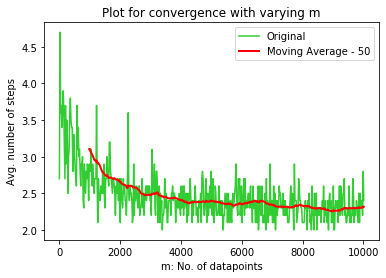

Time taken:  624.5963182


In [9]:
start=timer()

# init parameters
k=10
ep=0.1
m=list(range(10,10011,20))

# number of iterations to calculate the average
avg_iter=10

print("m values (List) =",m)
avg_steps_=[]

# running the sim
for m_i in m:
    # init avg number of steps to converge
    avg_steps=0
    for i in range(avg_iter):
        # generate X and Y
        X=gen_X(m_i,k,ep)
        Y=gen_Y(X,ep)

        # get number of steps to converge from PLA function        
        steps_to_converge, _, _ = PLA(X,Y)
        
        # summing up number of steps to converge
        avg_steps+=steps_to_converge
    
    # averaging number of steps to converge
    avg_steps/=avg_iter
    
    # add to a list to plot
    avg_steps_.append(avg_steps)

# converting to pandas dataframe to get the 
# rolling mean (moving average) for better analysis    
df_avg_steps = pd.DataFrame(avg_steps_)
rolling_mean_steps = df_avg_steps.rolling(window=50).mean()

# plotting    
plt.plot(m, avg_steps_, label="Original", color="limegreen")
plt.plot(m, rolling_mean_steps, label="Moving Average - 50", color="red", linewidth="2")
plt.xlabel("m: No. of datapoints") 
plt.ylabel("Avg. number of steps") 
plt.legend(loc="upper right")
plt.title("Plot for convergence with varying m")
plt.savefig('Q1_fig.png',dpi=1200)
plt.show()

print("Time taken: ", timer()-start)

## Answer 2

k values (List) = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

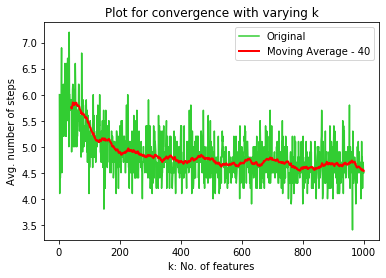

Time taken:  173.78885200000002


In [10]:
start=timer()

# init parameters
k=list(range(2,1001,1))
ep=0.05
m=100

# number of iterations to calculate the average
avg_iter=10


print("k values (List) =",k)
avg_steps_=[]

# running the sim
for k_i in k:
    # init avg number of steps to converge
    avg_steps=0
    for i in range(avg_iter):
        # generate X and Y
        X=gen_X(m,k_i,ep)
        Y=gen_Y(X,ep)
        
        # get number of steps to converge from PLA function
        steps_to_converge, _, _ = PLA(X,Y)
        
        # summing up number of steps to converge
        avg_steps+=steps_to_converge
    
    # averaging number of steps to converge
    avg_steps/=avg_iter
    
    # add to a list to plot
    avg_steps_.append(avg_steps)

# converting to pandas dataframe to get the 
# rolling mean (moving average) for better analysis    
df_avg_steps = pd.DataFrame(avg_steps_)
rolling_mean_steps = df_avg_steps.rolling(window=40).mean()

# plotting    
plt.plot(k, avg_steps_, label="Original", color="limegreen")
plt.plot(k, rolling_mean_steps, label="Moving Average - 40", color="red", linewidth="2")
plt.xlabel("k: No. of features") 
plt.ylabel("Avg. number of steps") 
plt.legend(loc="upper right")
plt.title("Plot for convergence with varying k")
plt.savefig('Q2_fig.png',dpi=1200)
plt.show()

print("Time taken: ", timer()-start)

## Answer 3

epsilon values (List) = [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95]


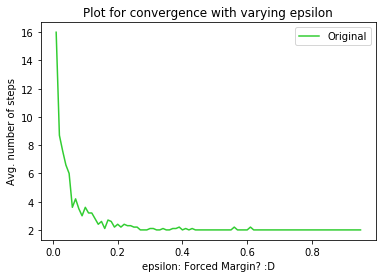

Time taken:  27.150961800000005


In [11]:
start=timer()

# init parameters
k=5
ep=np.arange(0.01,0.96,0.01)
m=100

# number of iterations to calculate the average
avg_iter=10

print("epsilon values (List) =",ep)
avg_steps_=[]

# running the sim
for ep_i in ep:
    # init avg number of steps to converge
    avg_steps=0
    for i in range(avg_iter):
        # generate X and Y
        X=gen_X(m,k,ep_i)
        Y=gen_Y(X,ep_i)
        
        # get number of steps to converge from PLA function
        steps_to_converge, _, _ = PLA(X,Y)
        
        # summing up number of steps to converge
        avg_steps+=steps_to_converge
    
    # averaging number of steps to converge
    avg_steps/=avg_iter
    
    # add to a list to plot
    avg_steps_.append(avg_steps)

#df_avg_steps = pd.DataFrame(avg_steps_)
#rolling_mean_steps = df_avg_steps.rolling(window=3).mean()

# plotting
plt.plot(ep, avg_steps_, label="Original", color="limegreen")
#plt.plot(ep, rolling_mean_steps, label="Moving Average - 3", color="red", linewidth="2", linestyle="dashed")
plt.xlabel("epsilon: Forced Margin? :D") 
plt.ylabel("Avg. number of steps") 
plt.legend(loc="upper right")
plt.title("Plot for convergence with varying epsilon")
plt.savefig('Q3_fig.png',dpi=1200)
plt.show()

print("Time taken: ", timer()-start)

## Bonus Part 1

m values (List) = [10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790, 810, 830, 850, 870, 890, 910, 930, 950, 970, 990, 1010, 1030, 1050, 1070, 1090, 1110, 1130, 1150, 1170, 1190, 1210, 1230, 1250, 1270, 1290, 1310, 1330, 1350, 1370, 1390, 1410, 1430, 1450, 1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650, 1670, 1690, 1710, 1730, 1750, 1770, 1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1950, 1970, 1990, 2010, 2030, 2050, 2070, 2090, 2110, 2130, 2150, 2170, 2190, 2210, 2230, 2250, 2270, 2290, 2310, 2330, 2350, 2370, 2390, 2410, 2430, 2450, 2470, 2490, 2510, 2530, 2550, 2570, 2590, 2610, 2630, 2650, 2670, 2690, 2710, 2730, 2750, 2770, 2790, 2810, 2830, 2850, 2870, 2890, 2910, 2930, 2950, 2970, 2990, 3010]


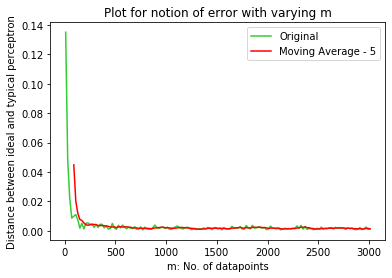

Time taken:  57.121473899999955


In [22]:
start=timer()

# init parameters
k=10
ep=0.1
m=list(range(10,3011,20))

# number of iterations to calculate the average
avg_iter=10

# init ideal weights and bias
wt_ideal=np.zeros((k))
wt_ideal[-1]=1
b_ideal=0

print("m values (List) =",m)
ordinate_val_list=[]

# running the sim
for m_i in m:    
    # init typical average wt and bias
    avg_wt_typ=np.zeros((k))
    avg_b_typ=0
    
    for i in range(avg_iter):        
        # generate X and Y
        X=gen_X(m_i,k,ep)
        Y=gen_Y(X,ep)
        
        # get typical wt and bias from PLA function
        _, wt_typical, b_typical = PLA(X,Y)
        
        # summing up wts and bias
        avg_wt_typ+=wt_typical
        avg_b_typ+=b_typical
    
    # averaging wts and bias
    avg_wt_typ/=avg_iter
    avg_b_typ/=avg_iter
    
    # normalizing/scaling weights and bias such that |w|^2 + b^2 = 1
    avg_wt_typ, avg_b_typ = normalize_w_and_b(avg_wt_typ,avg_b_typ)
    wt_ideal, b_ideal = normalize_w_and_b(wt_ideal,b_ideal)
    
    # calculating the value of the given equation in steps
    wt_diff=wt_ideal-avg_wt_typ
    b_diff=b_ideal-avg_b_typ    
    val=pow(LA.norm(wt_diff),2)+pow(b_diff,2)
    
    # add to a list to plot
    ordinate_val_list.append(val)

# converting to pandas dataframe to get the 
# rolling mean (moving average) for better analysis
df_val = pd.DataFrame(ordinate_val_list)
rolling_mean_steps = df_val.rolling(window=5).mean()

# plotting
plt.plot(m, ordinate_val_list, label="Original", color="limegreen")
plt.plot(m, rolling_mean_steps, label="Moving Average - 5", color="red") #, linestyle="dashed")
plt.xlabel("m: No. of datapoints") 
plt.ylabel("Distance between ideal and typical perceptron")
plt.legend(loc="upper right")
plt.title("Plot for notion of error with varying m")
plt.savefig('Bonus_1_fig.png',dpi=1200)
plt.show()

print("Time taken: ", timer()-start)

## Bonus Part 2

k values (List) = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

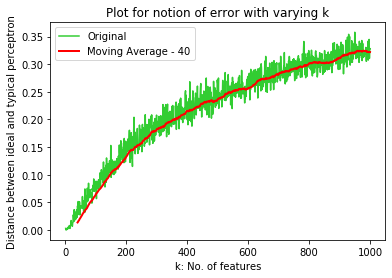

Time taken:  176.35292900000013


In [23]:
start=timer()

# init parameters
k=list(range(2,1001,1))
ep=0.05
m=100

# number of iterations to calculate the average
avg_iter=10

# init ideal bias
b_ideal=0

print("k values (List) =",k)
ordinate_val_list=[]

# running the sim
for k_i in k:    
    # init typical average wt and bias
    avg_wt_typ=np.zeros((k_i))
    avg_b_typ=0
    
    # init ideal weights
    wt_ideal=np.zeros((k_i))
    wt_ideal[-1]=1
    
    for i in range(avg_iter):        
        # generate X and Y
        X=gen_X(m,k_i,ep)
        Y=gen_Y(X,ep)
        
        # get typical wt and bias from PLA function
        _, wt_typical, b_typical = PLA(X,Y)
        
        # summing up wts and bias
        avg_wt_typ+=wt_typical
        avg_b_typ+=b_typical
    
    # averaging wts and bias
    avg_wt_typ/=avg_iter
    avg_b_typ/=avg_iter    
    
    # normalizing/scaling weights and bias such that |w|^2 + b^2 = 1
    avg_wt_typ, avg_b_typ = normalize_w_and_b(avg_wt_typ,avg_b_typ)
    wt_ideal, b_ideal = normalize_w_and_b(wt_ideal,b_ideal)
    
    # calculating the value of the given equation in steps
    wt_diff=wt_ideal-avg_wt_typ
    b_diff=b_ideal-avg_b_typ    
    val=pow(LA.norm(wt_diff),2)+pow(b_diff,2)
    
    # add to a list to plot
    ordinate_val_list.append(val)

# converting to pandas dataframe to get the 
# rolling mean (moving average) for better analysis
df_val = pd.DataFrame(ordinate_val_list)
rolling_mean_steps = df_val.rolling(window=40).mean()


# plotting
plt.plot(k, ordinate_val_list, label="Original", color="limegreen")
plt.plot(k, rolling_mean_steps, label="Moving Average - 40", color="red", linewidth="2")#, linestyle="dashed")
plt.xlabel("k: No. of features") 
plt.ylabel("Distance between ideal and typical perceptron")
plt.legend(loc="upper left")
plt.title("Plot for notion of error with varying k")
plt.savefig('Bonus_2_fig.png',dpi=1200)
plt.show()

print("Time taken: ", timer()-start)

## Bonus Part 3

epsilon values (List) = [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95]


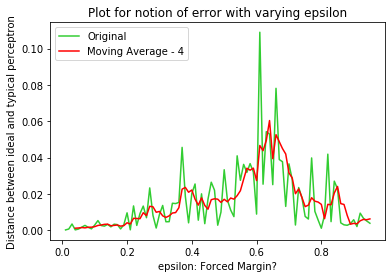

Time taken:  24.205285699999877


In [28]:
start=timer()

# init parameters
k=5
ep=np.arange(0.01,0.96,0.01)
m=100

# number of iterations to calculate the average
avg_iter=10

# init ideal weights and bias
wt_ideal=np.zeros((k))
wt_ideal[-1]=1
b_ideal=0

print("epsilon values (List) =",ep)
ordinate_val_list=[]

# running the sim
for ep_i in ep:    
    # init typical average wt and bias
    avg_wt_typ=np.zeros((k))
    avg_b_typ=0
    
    for i in range(avg_iter):        
        # generate X and Y
        X=gen_X(m,k,ep_i)
        Y=gen_Y(X,ep_i)
        
        # get typical wt and bias from PLA function
        _, wt_typical, b_typical = PLA(X,Y)
        
        # summing up wts and bias
        avg_wt_typ+=wt_typical
        avg_b_typ+=b_typical
    
    # averaging wts and bias
    avg_wt_typ/=avg_iter
    avg_b_typ/=avg_iter
    
    # normalizing/scaling weights and bias such that |w|^2 + b^2 = 1
    avg_wt_typ, avg_b_typ = normalize_w_and_b(avg_wt_typ,avg_b_typ)
    wt_ideal, b_ideal = normalize_w_and_b(wt_ideal,b_ideal)
    
    # calculating the value of the given equation in steps
    wt_diff=wt_ideal-avg_wt_typ
    b_diff=b_ideal-avg_b_typ    
    val=pow(LA.norm(wt_diff),2)+pow(b_diff,2)
    
    # add to a list to plot
    ordinate_val_list.append(val)

# converting to pandas dataframe to get the 
# rolling mean (moving average) for better analysis
df_val = pd.DataFrame(ordinate_val_list)
rolling_mean_steps = df_val.rolling(window=4).mean()


# plotting
plt.plot(ep, ordinate_val_list, label="Original", color="limegreen")
plt.plot(ep, rolling_mean_steps, label="Moving Average - 4", color="red") #, linestyle="dashed")
plt.xlabel("epsilon: Forced Margin?")
plt.ylabel("Distance between ideal and typical perceptron")
plt.legend(loc="upper left")
plt.title("Plot for notion of error with varying epsilon")
plt.savefig('Bonus_3_fig.png',dpi=1200)
plt.show()

print("Time taken: ", timer()-start)

# End of Perceptron

In [25]:
w=np.asarray([2,4,6])
w

array([2, 4, 6])

In [16]:
w2=np.dot(w,w)
w2

56

In [17]:
w3=np.dot(w,np.transpose(w))
w3

56

In [18]:
w4=np.matmul(w,w)
w4

56

In [19]:
import collections

d = {2:3, 1:89, 4:5, 3:0}

od = collections.OrderedDict(sorted(d.items(),reverse=True))

od
#OrderedDict([(1, 89), (2, 3), (3, 0), (4, 5)])

OrderedDict([(4, 5), (3, 0), (2, 3), (1, 89)])

In [20]:
#for i in range(10):
    
#for item in list:
    
A=[1,5,7,10]
B=[7,8,9,10]
# for item in A:
#     print(item)

for a_i, b_i in zip(A,B):
    print(a_i, b_i)

1 7
5 8
7 9
10 10


In [21]:
w=np.asarray([-2,2])
#w
w2=np.dot(w,w)
w2

8